{'input_dim': 2, 'epsion': 0.1, 'output_dim': 1, 'hidden_units': [200, 200, 200], 'astddev': 0.22360679774997896, 'bstddev': 0.22360679774997896, 'ASI': 0, 'learning_rate': 1e-06, 'learning_rateDecay': 2e-07, 'train_size': 1500, 'batch_size': 1500, 'test_size': 1500, 'x_start': -1.5707963267948966, 'x_end': 1.5707963267948966, 'epotch': 10000}
Net(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=200, out_features=200, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=200, out_features=200, bias=True)
    (5): ReLU(inplace)
    (6): Linear(in_features=200, out_features=1, bias=True)
  )
)
train  step: 500 , loss: 1388.00830078125
test   step: 500 , loss: 1406.401123046875
train  step: 1000 , loss: 1310.97607421875
test   step: 1000 , loss: 1323.594482421875
train  step: 1500 , loss: 1197.59423828125
test   step: 1500 , loss: 1205.5843505859375
train  step: 2000 , loss: 1021.6390380859375
te

/Users/liuchangkundeimac/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


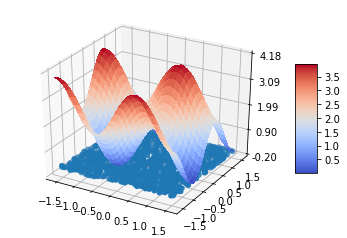

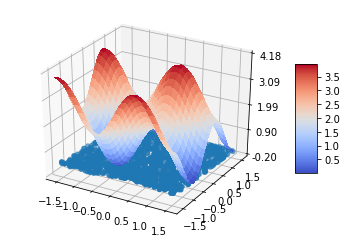

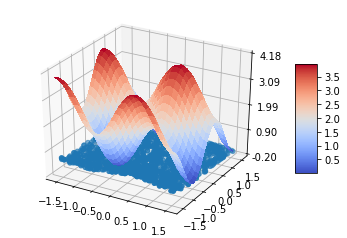

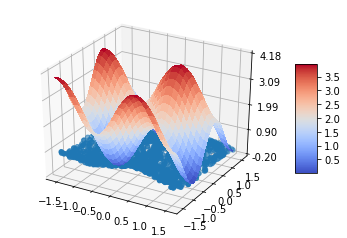

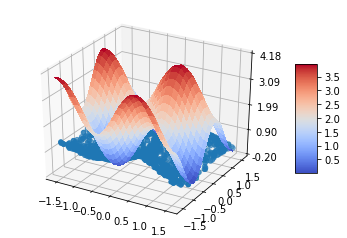

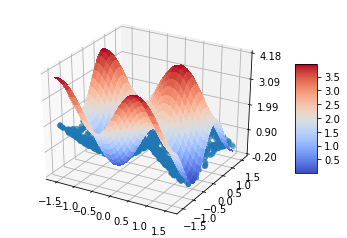

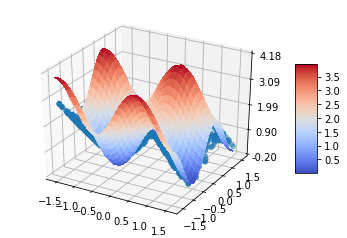

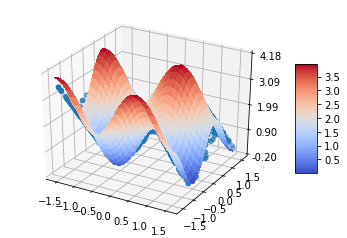

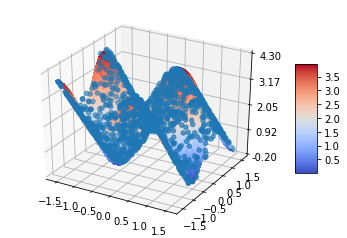

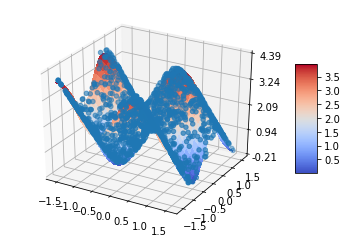

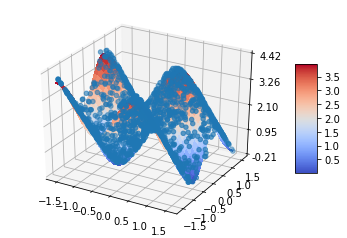

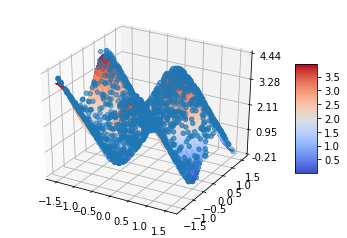

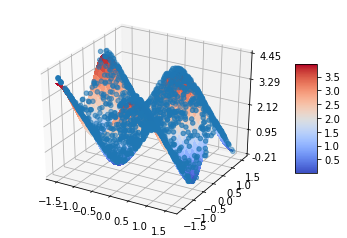

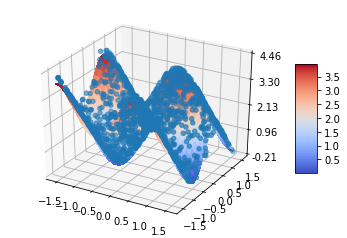

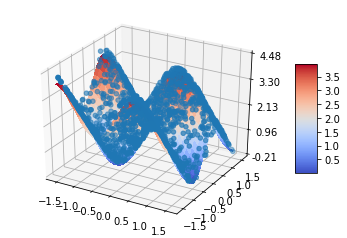

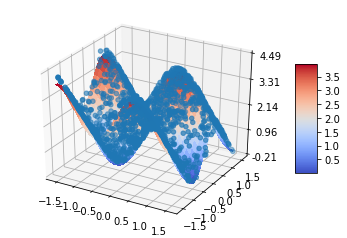

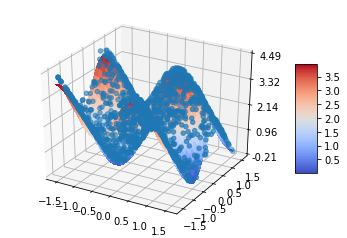

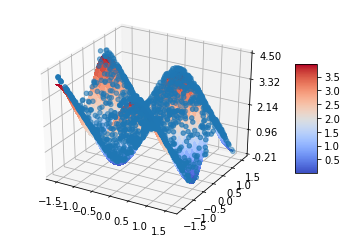

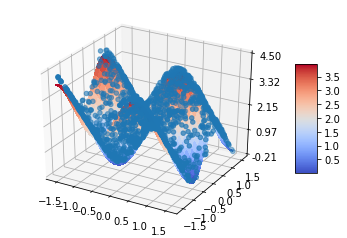

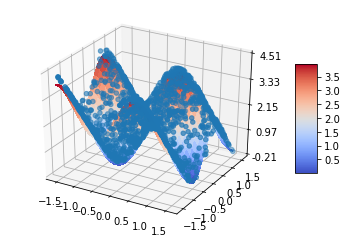

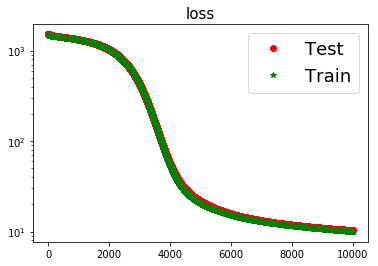

<Figure size 432x288 with 0 Axes>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline
R_variable={}  ### used for saved all parameters and data
R_variable['input_dim']=2
R_variable['epsion']=0.1
R_variable['output_dim']=1
R_variable['hidden_units']=[200,200,200]
### initialization standard deviation
R_variable['astddev']=np.sqrt(1/20) # for weight
R_variable['bstddev']=np.sqrt(1/20)# for bias terms2
R_variable['ASI']=0
R_variable['learning_rate']=1e-6
R_variable['learning_rateDecay']=2e-7
R_variable['train_size']=1500;  ### training size
R_variable['batch_size']=R_variable['train_size'] # int(np.floor(R_variable['train_size'])) ### batch size
R_variable['test_size']=R_variable['train_size']  ### test size
R_variable['x_start']=-np.pi/2  #math.pi*3 ### start point of input
R_variable['x_end']=np.pi/2  #6.28/4 #math.pi*3  ### end point of input
R_variable['epotch'] = 10000
print(R_variable) 

# x = torch.randn(R_variable['train_size']=1000, R_variable['input_dim'])
# y = torch.randn(R_variable['train_size']=1000, R_variable['output_dim']) 
if R_variable['input_dim']==1:
    x_train =np.reshape(np.linspace(R_variable['x_start'], R_variable['x_end'], num=R_variable['test_size'],
                                                      endpoint=True),[R_variable['test_size'],1])
    x_test = np.reshape(np.linspace(R_variable['x_start'], R_variable['x_end'], num=R_variable['test_size'],
                                                      endpoint=True),[R_variable['test_size'],1])
    x_train = x_train.astype(np.float32)
    x_test = x_test.astype(np.float32)
else:
    x_train =np.random.rand(R_variable['test_size'],R_variable['input_dim'])*(R_variable['x_end']-R_variable['x_start'])+R_variable['x_start']
    x_train = x_train.astype(np.float32)
    x_test =np.random.rand(R_variable['test_size'],R_variable['input_dim'])*(R_variable['x_end']-R_variable['x_start'])+R_variable['x_start']
    x_test = x_test.astype(np.float32)
    

x_train = torch.tensor(x_train)
x_test = torch.tensor(x_test)


class Net(torch.nn.Module):
    def __init__(self, in_dim,hidden_units,out_dim):
        super(Net, self).__init__()  
        self.layer = torch.nn.Sequential(
            torch.nn.Linear(in_dim,hidden_units[0]), 
            torch.nn.ReLU(True),
            torch.nn.Linear(hidden_units[0],hidden_units[1]),
            torch.nn.ReLU(True),
            torch.nn.Linear(hidden_units[1],hidden_units[2]),
            torch.nn.ReLU(True),
            torch.nn.Linear(hidden_units[2], out_dim)
             )
    def forward(self, x):
        y_pre = self.layer(x)
        return y_pre

    
def get_y_func(xs):
    tmp=0
    for ii in range(R_variable['input_dim']):
          tmp+=np.sin(3*xs[:,ii:ii+1])
#         tmp +=  (xs[:,ii:ii+1])**2+(xs[:,ii:ii+1])**3+4*(xs[:,ii:ii+1])**4+5*(xs[:,ii:ii+1])**6+10*(xs[:,ii:ii+1])**7
    return tmp

y_true_test = get_y_func(x_test)


def ploty(ytr,yte,ep):
        
        if R_variable['input_dim']==2:
            # Make data.
            X = np.arange(R_variable['x_start'], R_variable['x_end'], 0.1)
            Y = np.arange(R_variable['x_start'], R_variable['x_end'], 0.1)
            X, Y = np.meshgrid(X, Y)
            xy=np.concatenate((np.reshape(X,[-1,1]),np.reshape(Y,[-1,1])),axis=1)
            Z = np.reshape(get_y_func(xy),[len(X),-1])
            fp = plt.figure()
            ax = fp.gca(projection='3d')
            # Plot the surface.
            surf = ax.plot_surface(X, Y, Z-np.min(Z), cmap=cm.coolwarm,linewidth=0, antialiased=False)
            # Customize the z axis.
            #ax.set_zlim(-2.01, 2.01)
            ax.zaxis.set_major_locator(LinearLocator(5))
            ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
            # Add a color bar which maps values to colors.
            fp.colorbar(surf, shrink=0.5, aspect=5)
            y = ytr.detach().numpy()
            ax.scatter(x_train[:,0], x_train[:,1], y-np.min(y))
#             plt.show()
            plt.savefig('/Users/liuchangkundeimac/Desktop/pictures/picture%d.png'%ep)
    
        if R_variable['input_dim']==1:
            plt.figure()
            ax = plt.gca()
            y1 = yte.detach().numpy()
            y2 = ytr.detach().numpy()
            y3 = y_true_test.numpy()
            test_inputs = np.array(x_test)
            train_inputs = np.array(x_train)
            plt.plot(test_inputs,y1,'ro',label='Test')
            plt.plot(train_inputs,y2,'g*',label='Train')
            plt.plot(test_inputs,y3,'b*',label='True')
            plt.title('g2u',fontsize=15)        
            plt.legend(fontsize=18) 
            plt.show()
#             plt.savefig('/Users/liuchangkundeimac/Desktop/pictures/picture%d.png'%ep)
    
def plotloss(loss_test,loss_train):
    y1 = loss_test
    y2 = loss_train
    plt.figure()
    ax = plt.gca()
    plt.plot(y1,'ro',label='Test')
    plt.plot(y2,'g*',label='Train')
#     ax.set_xscale('log')
    ax.set_yscale('log')                
    plt.legend(fontsize=18)
    plt.title('loss',fontsize=15)
    plt.show()
    plt.savefig('/Users/liuchangkundeimac/Desktop/pictures/loss.png')
    
model = Net(R_variable['input_dim'],R_variable['hidden_units'], R_variable['output_dim'])     # define the network
print(model)  # net architecture

def train_test(model):
    loss_train = []
    loss_test = []
    # Construct our loss function and an Optimizer. The call to model.parameters()
    # in the SGD constructor will contain the learnable parameters of the two
    # nn.Linear modules which are members of the model.
    criterion = torch.nn.MSELoss(reduction='sum')
    optimizer = torch.optim.SGD(model.parameters(), lr=R_variable['learning_rate'])
    for ep in range(R_variable['epotch']):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred_train = model.forward(x_train)
        y_pred_test = model.forward(x_test)
        # Compute and print loss
        y_train = get_y_func(x_train)
        y_test = get_y_func(x_test)
        loss1 = criterion(y_pred_train, y_train)
        loss2 = criterion(y_pred_test, y_test)
        loss_train.append(loss1)
        loss_test.append(loss2)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss1.backward()
        optimizer.step()
        if (ep+1)%500==0:
            print("train  step: {0} , loss: {1}".format(ep+1,loss1.item()))       
            print("test   step: {0} , loss: {1}".format(ep+1,loss2.item()))
            ploty(y_pred_train,y_pred_test,ep)
            
    plotloss(loss_test,loss_train)
    
train_test(model)